In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("./data-smartphone.csv")                   

In [3]:
dimensi = data.shape #instan
print("jumlah baris dan kolom: ", dimensi)

print("jumlah baris: ", dimensi[0])
print("jumlah kolom: ", dimensi[1])
      

jumlah baris dan kolom:  (407, 8)
jumlah baris:  407
jumlah kolom:  8


In [4]:
data.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [5]:
data[data.duplicated()]

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
45,Apple,iPhone 12 Mini,64 GB,4 GB,5.4,12 + 12,2227,699
61,Xiaomi,Poco M3 Pro 5G,64 GB,4 GB,6.5,48 + 2 + 2,5000,199
132,Nokia,XR20,128GB,6GB,6.67,48MP + 13MP,4630,$549
170,Motorola,Moto G Stylus 5G,128GB,5GB,6.8,48MP + 8MP + 5MP,5000,$399
195,Oppo,A74 5G,128GB,6GB,6.5,48MP + 2MP + 2MP,5000,$299
221,Vivo,Y12s,32GB,3GB,6.51,13MP + 2MP,5000,$149
229,Xiaomi,Redmi Note 10 Pro Max,128GB,8GB,6.67,108MP + 8MP + 5MP + 2MP,5020,$329
240,Nokia,C20 Plus,32GB,3GB,6.5,8MP + 2MP,4950,$99
246,Xiaomi,Poco X3 Pro,128GB,6GB,6.67,48MP + 8MP + 2MP + 2MP,5160,$249
248,Oppo,A16,32GB,3GB,6.52,13MP + 2MP + 2MP,5000,$149


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(381, 8)

In [8]:
data.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [9]:
data["Price ($)"]=data["Price ($)"].str.replace("$","")
data["Price ($)"]=data["Price ($)"].str.replace(",","")
data["Price ($)"]=data["Price ($)"].str.replace(" ","")
data["Price ($)"]=data["Price ($)"].astype("int64")

In [10]:
data["Storage "]=data["Storage "].str.replace("GB","")
data["Storage "]=data["Storage "].str.replace(" ","")
data["Storage "]=data["Storage "].astype("int64")

In [11]:
data["RAM "]=data["RAM "].str.replace("GB","")
data["RAM "]=data["RAM "].str.replace(" ","")
data["RAM "]=data["RAM "].astype("int64")

In [12]:
data["Screen Size (inches)"]=data["Screen Size (inches)"].str.replace(" (unfolded)","")

data['Screen Size (inches)']=data['Screen Size (inches)'].apply(lambda x : float(x.split('+')[0].strip()))

In [13]:
data["Camera (MP)"]=data["Camera (MP)"].str.replace("MP","")
data["Camera (MP)"]=data["Camera (MP)"].str.replace("3D","")
data["Camera (MP)"]=data["Camera (MP)"].str.replace(" ","")

In [14]:
data['Camera (MP)']=data['Camera (MP)'].str.replace("''","")
data['Camera (MP)']=data['Camera (MP)'].str.replace('[a-zA-Z]',"",regex=True)

In [15]:
data['Camera (MP)'].unique()

array(['12+12+12', '108+10+10+12', '48+50+8+2', '64+8+5+2', '50+12.2',
       '12+12', '48+8+2+2', '50+13+16+2', '50+48+12+8', '64+8+2',
       '64+12+5+5', '50+50+13+3', '64+8+5', '64+12+12', '50+2+2',
       '48+2+2', '50+8+2+2', '48+5', '48+50+2', '108+8+5+2', '13+2+2',
       '13+2', '12', '48+5+2', '50+8+2', '64+8+2+2', '48+8+5', '64+8',
       '48+5+2+2', '50+2', '64+12+8+5', '64+2', '48+13+13', '50+12',
       '50+16+13+2', '108+16+8', '48+13', '64+13+12', '64+12+8', '13+5',
       '108+8+2', '64+5+2+2', '64+12', '48+50+8', '50+48+48', '8+2',
       '12+12+8', '64+13+5', '12+13', '64+8+5+5', '48+8+2', '48+2',
       '108+12+10+10', '50+5', '48+8+5+5', '108+8+2+2', '13', '48+8+5+2',
       '13+5+2', '8', '13+5+2+2', '13+8+5+2', '13+8+2+2', '12+2+2',
       '13+8+2', '25+8+5', '108+12+12', '12.2+16', '50+20+12+',
       '64+12+2+2', '108+13+5', '48+16+5+2', '12+7', '50+12+40+',
       '50+8+16+2', '48+12+5', '48+48+8+5', '40+40+8+', '48+12+13',
       '40+20+8+', '48+16+8', '16+8+

In [16]:
def clean(x):
  x=x.split('+')
  for i in range(len(x)):
    if(x[-1] == ''):
      x[-1]=0
    x[i] = float(x[i])
  return max(x)

data['Camera (MP)']=data['Camera (MP)'].apply(clean)

In [17]:
data['Camera (MP)']=data['Camera (MP)'].astype("float")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 0 to 405
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   381 non-null    object 
 1   Model                   381 non-null    object 
 2   Storage                 381 non-null    int64  
 3   RAM                     381 non-null    int64  
 4   Screen Size (inches)    381 non-null    float64
 5   Camera (MP)             381 non-null    float64
 6   Battery Capacity (mAh)  381 non-null    int64  
 7   Price ($)               381 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.8+ KB


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data.describe()

,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,124.556430,5.879265,6.475932,44.047244,4683.958005,411.706037
std,66.124485,2.466857,0.310012,24.602586,792.927831,305.185669
min,32.000000,2.000000,4.500000,8.000000,1821.000000,99.000000
25%,64.000000,4.000000,6.440000,13.000000,4300.000000,199.000000
50%,128.000000,6.000000,6.500000,48.000000,5000.000000,299.000000
75%,128.000000,8.000000,6.580000,64.000000,5000.000000,499.000000
max,512.000000,16.000000,7.600000,108.000000,7000.000000,1999.000000


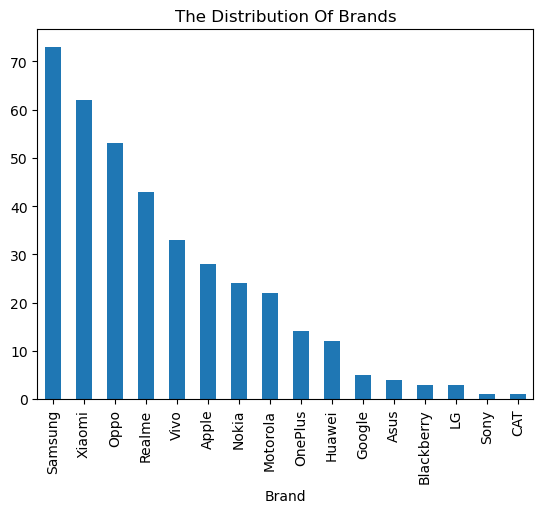

In [21]:
data['Brand'].value_counts().plot.bar()
plt.title("The Distribution Of Brands")
plt.show()

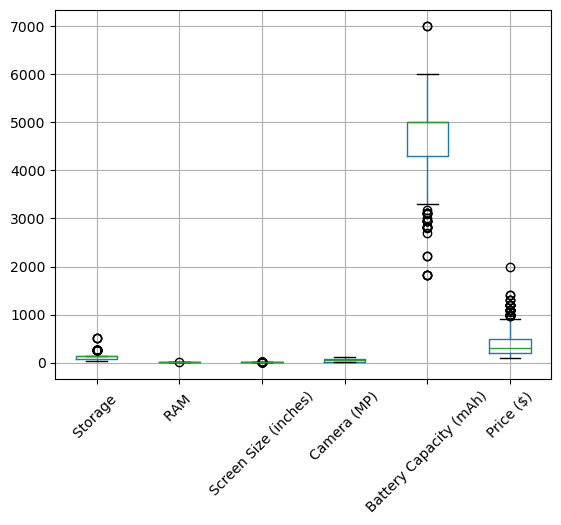

In [22]:
data.boxplot()
plt.xticks(rotation =45)
plt.show()

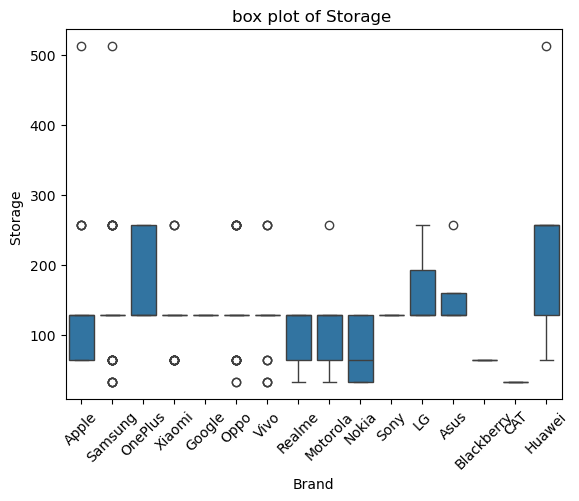

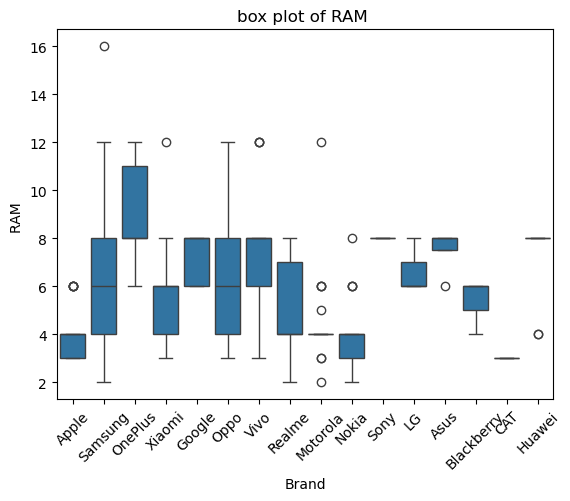

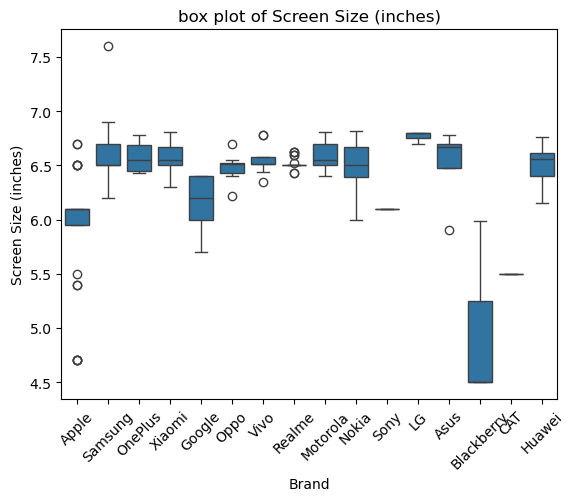

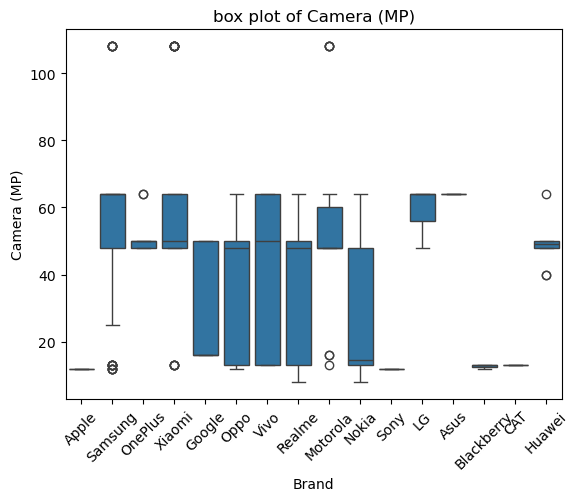

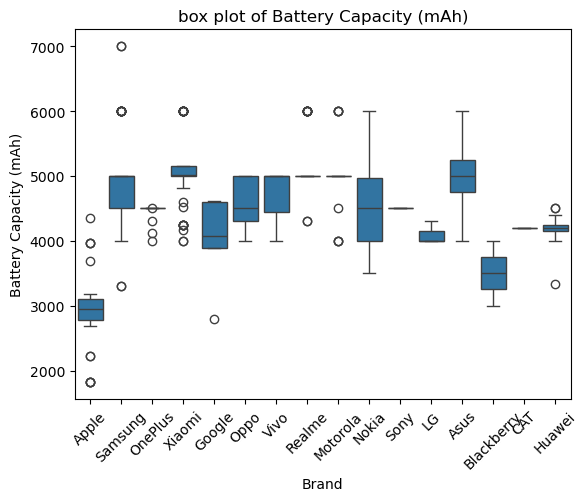

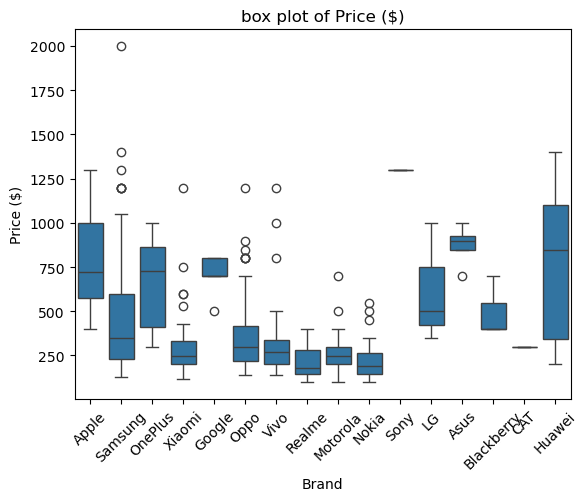

In [25]:
numeric_cols= data.select_dtypes(include=['number']).columns

for i in numeric_cols :
    sns.boxplot(data = data , x = 'Brand' , y= i)
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.title("box plot of "+i)
    plt.show()

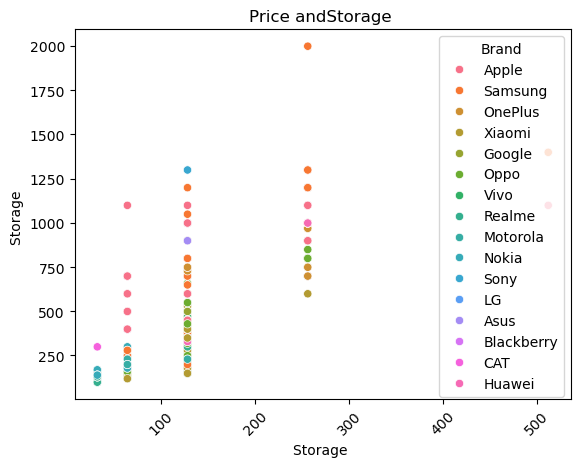

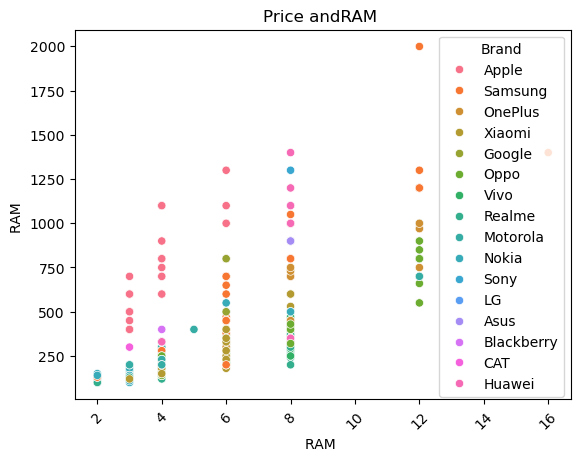

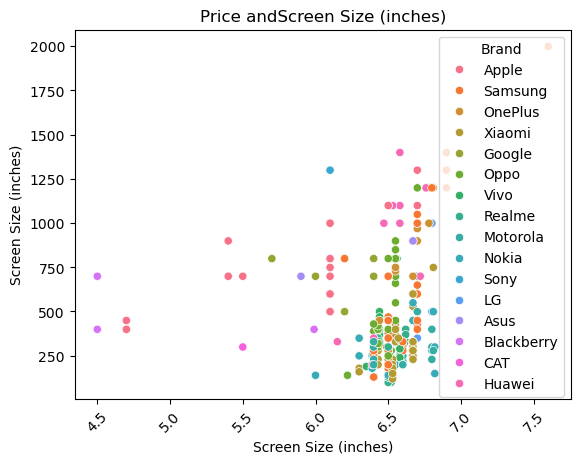

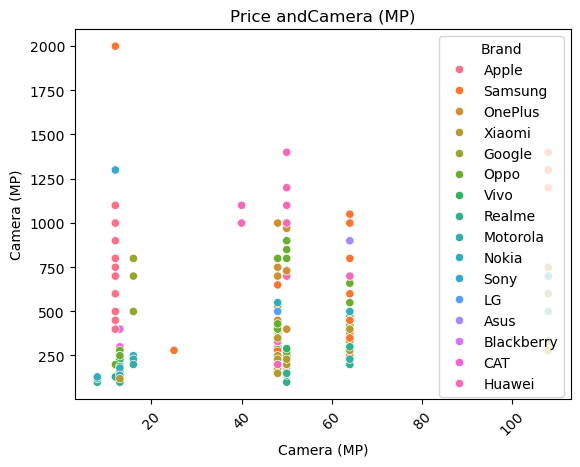

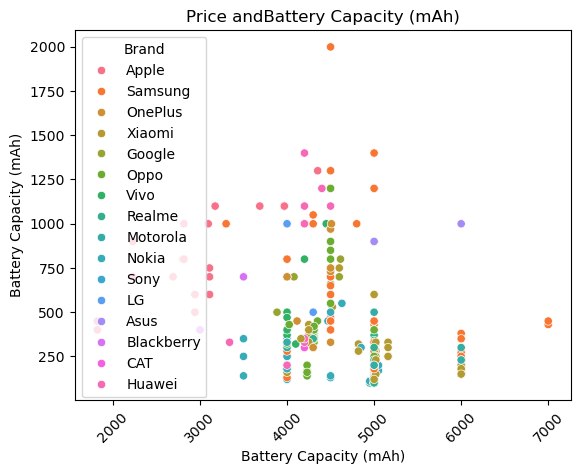

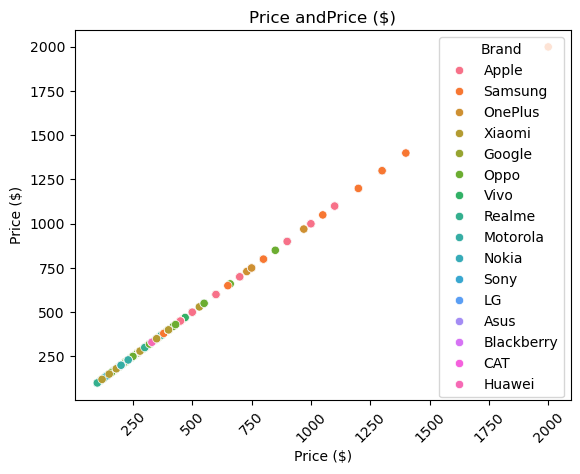

In [26]:
for i in numeric_cols :
  sns.scatterplot(data=data, x=i, y= "Price ($)", hue="Brand")
  plt.ylabel(i)
  plt.xticks(rotation=45)
  plt.title("Price and" + i)
  plt.show()

<Axes: >

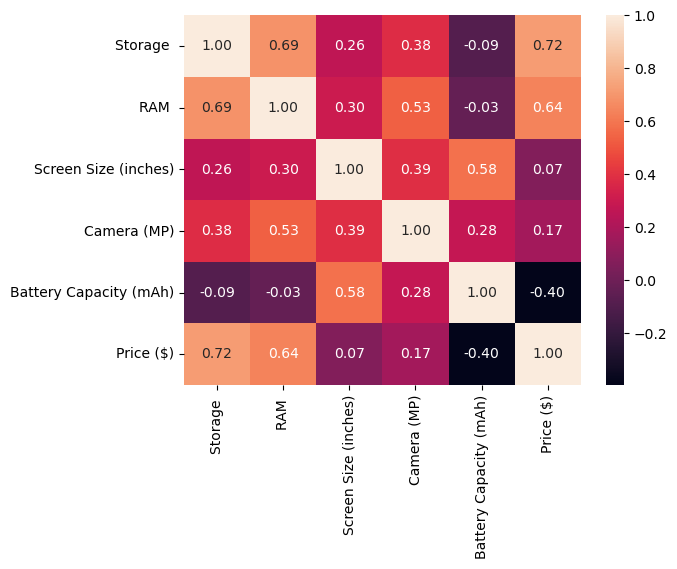

In [30]:
numeric_cols = data.select_dtypes(include=['number'])
corr_mat=numeric_cols.corr()
sns.heatmap(corr_mat,annot=True, fmt='.2f')

In [32]:
data.drop(columns= ['Model'], inplace=True)

In [33]:
print(data.columns)

Index(['Brand', 'Storage ', 'RAM ', 'Screen Size (inches)', 'Camera (MP)',
       'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')


In [34]:
data=pd.get_dummies(data, columns=['Brand'])

In [35]:
data

,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,...,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,128,6,6.10,12.0,3095,999,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,256,12,6.80,108.0,5000,1199,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,128,8,6.70,50.0,4500,899,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,128,6,6.67,64.0,5020,279,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,128,8,6.40,50.0,4614,799,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,128,4,6.15,48.0,3340,329,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
402,128,8,6.70,64.0,4300,1049,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
403,128,6,6.57,48.0,4160,349,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
404,128,6,6.70,12.0,3687,1099,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
data.columns.tolist()

['Storage ',
 'RAM ',
 'Screen Size (inches)',
 'Camera (MP)',
 'Battery Capacity (mAh)',
 'Price ($)',
 'Brand_Apple',
 'Brand_Asus',
 'Brand_Blackberry',
 'Brand_CAT',
 'Brand_Google',
 'Brand_Huawei',
 'Brand_LG',
 'Brand_Motorola',
 'Brand_Nokia',
 'Brand_OnePlus',
 'Brand_Oppo',
 'Brand_Realme',
 'Brand_Samsung',
 'Brand_Sony',
 'Brand_Vivo',
 'Brand_Xiaomi']

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Pisahkan fitur dan target
x = data.drop(columns=['Price ($)'])  # semua kolom kecuali harga
y = data['Price ($)']                 # target harga

# Normalisasi hanya fitur
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Latih model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [40]:
import math
# Evaluasi performa model
mse = mean_squared_error(y_test, y_pred)                    # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)                   # Mean Absolute Error
rmse = math.sqrt(mean_squared_error(y_test, y_pred))   # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)                               # R² Score

# Tampilkan hasil dengan format rapi
print("=== Evaluasi Model Regresi Linear ===")
print(f"MSE  : {mse:.4f}")      # Semakin kecil semakin baik
print(f"MAE  : {mae:.4f}")      # Rata-rata selisih absolut
print(f"RMSE : {rmse:.4f}")     # Rata-rata deviasi prediksi
print(f"R²   : {r2:.4f}")       # Semakin mendekati 1 semakin baik

=== Evaluasi Model Regresi Linear ===
MSE  : 15213.7091
MAE  : 91.7846
RMSE : 123.3439
R²   : 0.8255


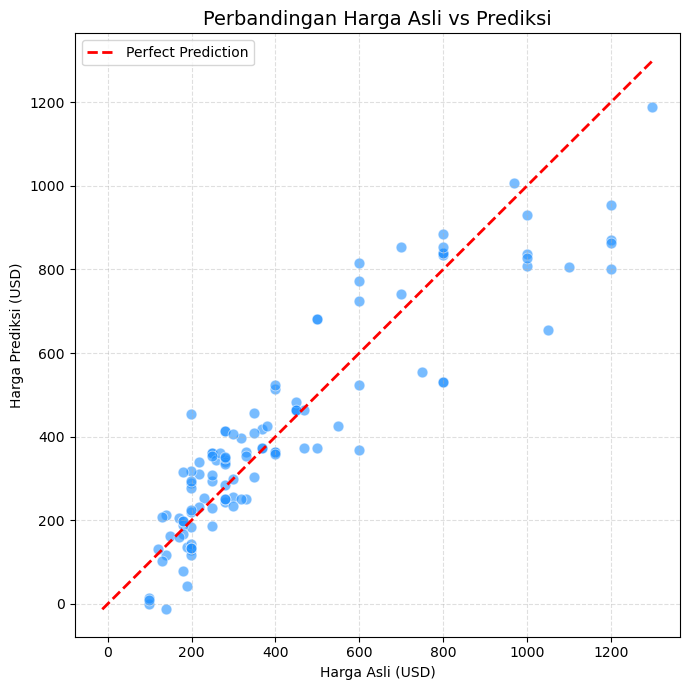

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure
plt.figure(figsize=(7,7))

# Scatter plot: harga asli vs prediksi
sns.scatterplot(x=y_test, y=y_pred, color="dodgerblue", alpha=0.6, s=60)

# Garis diagonal (garis sempurna prediksi = real)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label="Perfect Prediction")

# Label dan judul
plt.title("Perbandingan Harga Asli vs Prediksi", fontsize=14)
plt.xlabel("Harga Asli (USD)")
plt.ylabel("Harga Prediksi (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [42]:
new_data = pd.DataFrame([{
    'Storage ': 256,
    'RAM ': 8,
    'Screen Size (inches)': 6.8,
    'Camera (MP)': 108,
    'Battery Capacity (mAh)': 5000,
    'Brand_Apple': 1,
    'Brand_Asus': 0,
    'Brand_Blackberry': 0,
    'Brand_CAT': 0,
    'Brand_Google': 0,
    'Brand_Huawei': 0,
    'Brand_LG': 0,
    'Brand_Motorola': 0,
    'Brand_Nokia': 0,
    'Brand_OnePlus': 0,
    'Brand_Oppo': 0,
    'Brand_Realme': 0,
    'Brand_Samsung': 0,
    'Brand_Sony': 0,
    'Brand_Vivo': 0,
    'Brand_Xiaomi': 0
}])

# Pastikan semua kolom sama urutan dan lengkap
for col in x.columns:
    if col not in new_data.columns:
        new_data[col] = 0

new_data = new_data[x.columns]

# Scaling pakai scaler lama
new_data_scaled = pd.DataFrame(scaler.transform(new_data), columns=x.columns)

# Prediksi
pred_price = model.predict(new_data_scaled)
print(f"Prediksi harga (USD): {pred_price[0]:.2f}")

Prediksi harga (USD): 1095.13


In [44]:
# Ambil semua kolom brand hp di x.columns
brand_list = [col for col in x.columns if col.startswith('Brand_')]

def predict_phone_price(brand, storage, ram, camera, screen_size, battery) :
    new_data = pd.DataFrame([{
        'Storage ': storage,
        'RAM ': ram,
        'Screen Size (inches)': screen_size,
        'Camera (MP)': camera,
        'Battery Capacity (mAh)': battery,
    }])

    for b in brand_list:
        if b == f'Brand_{brand}':
            new_data[b] = 1
        else:
            new_data[b] = 0

    new_data = new_data[x.columns]

    new_data_scaled = pd.DataFrame(scaler.transform(new_data), columns=x.columns)

    predicted_price = model.predict(new_data_scaled)[0]

    print(f"📱 Prediksi harga untuk smartphone {brand} (Storage: {storage} GB, RAM: {ram} GB, Camera: {camera} MP dan Screen: {screen_size} inch): ${predicted_price:.2f}")
    return predicted_price

In [45]:
predict_phone_price(
    brand="Apple",
    storage=256,
    ram=8,
    camera=108,
    screen_size=6.8,
    battery=5000
)

📱 Prediksi harga untuk smartphone Apple (Storage: 256 GB, RAM: 8 GB, Camera: 108 MP dan Screen: 6.8 inch): $1095.13


np.float64(1095.126563115692)